# Plot Maps of the Three Major Interconnections in the United States


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable


## Set the Directory Structure


In [2]:
# Identify the data input and image output directories:
data_input_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2024_applied_energy/data'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2024_applied_energy/figures/Random/'


## Create the Function to Plot the Service Territory for a Given BA


/Users/burl878/.pyenv/versions/tell/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: /Users/burl878/Documents/Code/code_repos/burleyson-etal_2024_applied_energy/data/interconnection_shapefiles/NERC_Regions_EIA.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
/Users/burl878/.pyenv/versions/tell/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


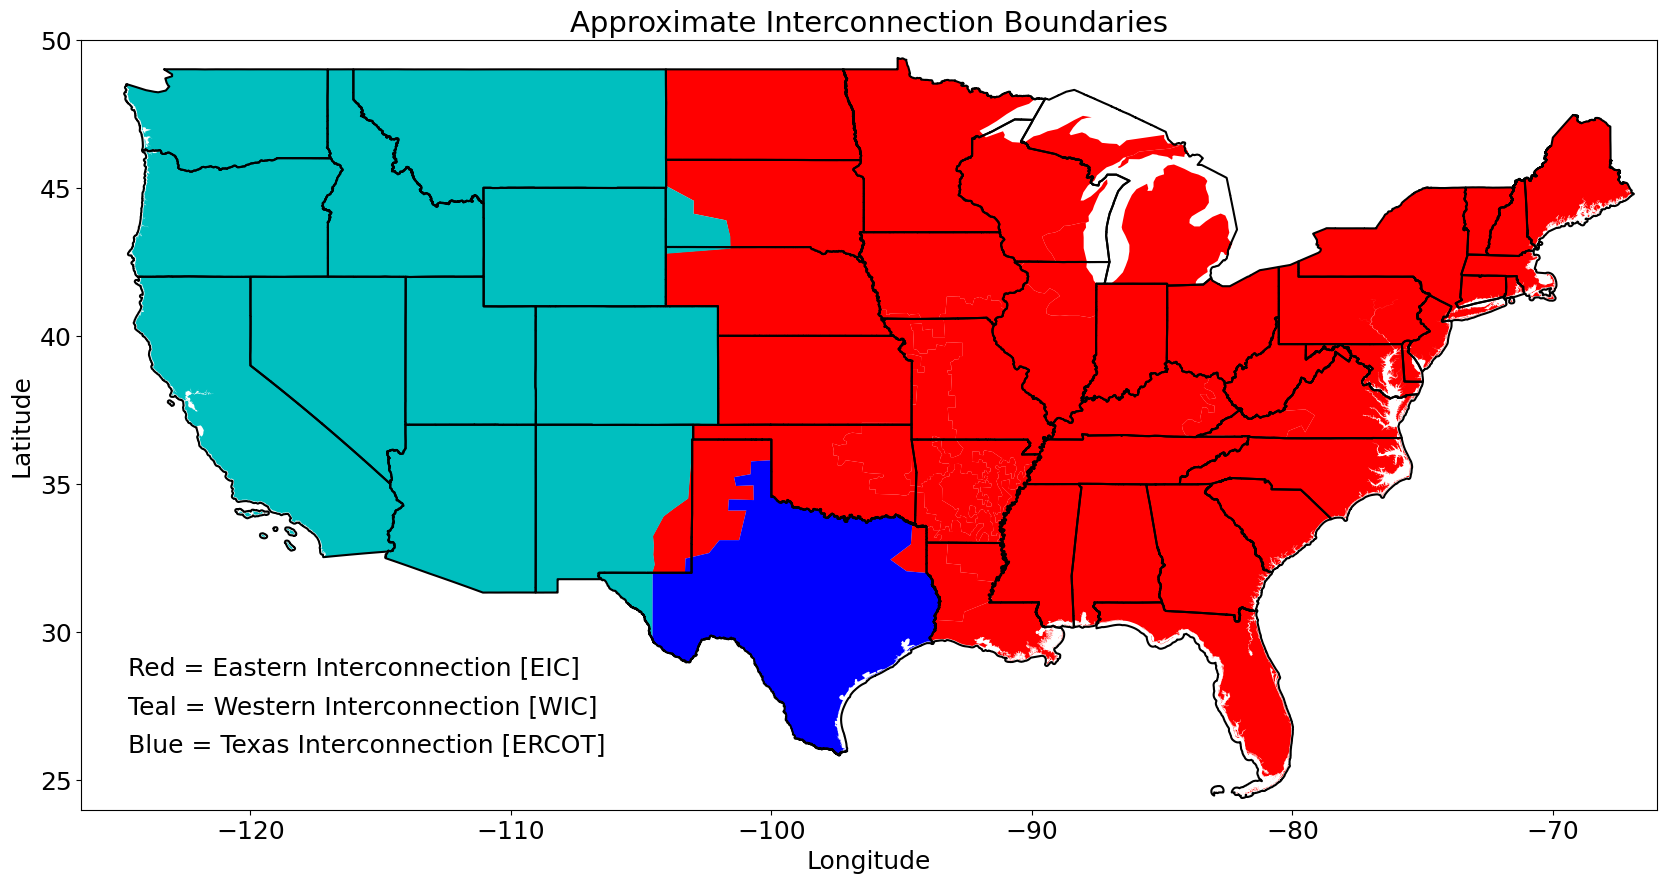

In [34]:
# Read in the county shapefile and reassign the 'FIPS' variable as integers:
ics_df = gpd.read_file(os.path.join(data_input_dir, r'interconnection_shapefiles', r'NERC_Regions_EIA.shp'))
ics_df['color'] = ['r','r','r','r','r','b','c','r']

# Reproject the shapefile onto latitute and longitude coordinates:
ics_df  = ics_df.to_crs({'init': 'EPSG:4269'})

# Read in the state shapefile:
states_df = gpd.read_file(os.path.join(data_input_dir, r'state_shapefiles', 'tl_2022_us_state.shp')).rename(columns={'NAME': 'State'})

# Create the figure:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.rcParams['font.size'] = 18
ax1 = ics_df.plot(ax=ax, edgecolor='black', linewidth=0, color=ics_df['color'])
ax2 = states_df.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)
ax.set_xlim(-126.5, -66);
ax.set_xlabel('Longitude', fontsize=18); 
ax.set_ylim(24, 50); 
ax.set_ylabel('Latitude', fontsize=18);
ax.set_title(('Approximate Interconnection Boundaries'), fontsize=21)

ax.text(0.03, 0.20, 'Red = Eastern Interconnection [EIC]', transform=ax.transAxes, fontsize=18, verticalalignment='top')
ax.text(0.03, 0.15, 'Teal = Western Interconnection [WIC]', transform=ax.transAxes, fontsize=18, verticalalignment='top')
ax.text(0.03, 0.10, 'Blue = Texas Interconnection [ERCOT]', transform=ax.transAxes, fontsize=18, verticalalignment='top')

filename = ('Interconnections_Map.png')
plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')
